In [27]:
%load_ext autoreload
%autoreload 2

[Qibo 0.2.14|INFO|2025-02-24 15:21:53]: Using numpy backend on /CPU:0


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from CIPEC import *

# 1) Single-qubit basis

In [31]:
# 1-qubit CPTP maps (including T)
B = noiseless_basis(1,include_T=True)

G = gram_matrix(B)
#disp(G)
if np.linalg.matrix_rank(G)==len(B):
    print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{list(B.keys())}")

    print(f'\nHere are their Choi matrices:')
    for v in B.values():
        disp(v)

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"

The following 13 channels form a basis of 1q CPTP maps:
[('H',), ('S',), ('T',), ('H', 'H'), ('H', 'S'), ('H', 'T'), ('S', 'H'), ('T', 'H'), ('H', 'S', 'H'), ('S', 'H', 'T'), ('Px',), ('Py',), ('Pz',)]

Here are their Choi matrices:


Matrix([
[ 0.5,  0.5,  0.5, -0.5],
[ 0.5,  0.5,  0.5, -0.5],
[ 0.5,  0.5,  0.5, -0.5],
[-0.5, -0.5, -0.5,  0.5]])

Matrix([
[  1.0, 0, 0, -1.0*I],
[    0, 0, 0,      0],
[    0, 0, 0,      0],
[1.0*I, 0, 0,    1.0]])

Matrix([
[            1.0, 0, 0, 0.707 - 0.707*I],
[              0, 0, 0,               0],
[              0, 0, 0,               0],
[0.707 + 0.707*I, 0, 0,             1.0]])

Matrix([
[1.0, 0, 0, 1.0],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[1.0, 0, 0, 1.0]])

Matrix([
[   0.5,    0.5, -0.5*I, 0.5*I],
[   0.5,    0.5, -0.5*I, 0.5*I],
[ 0.5*I,  0.5*I,    0.5,  -0.5],
[-0.5*I, -0.5*I,   -0.5,   0.5]])

Matrix([
[             0.5,              0.5, 0.354 - 0.354*I, -0.354 + 0.354*I],
[             0.5,              0.5, 0.354 - 0.354*I, -0.354 + 0.354*I],
[ 0.354 + 0.354*I,  0.354 + 0.354*I,             0.5,             -0.5],
[-0.354 - 0.354*I, -0.354 - 0.354*I,            -0.5,              0.5]])

Matrix([
[   0.5, -0.5*I,    0.5, 0.5*I],
[ 0.5*I,    0.5,  0.5*I,  -0.5],
[   0.5, -0.5*I,    0.5, 0.5*I],
[-0.5*I,   -0.5, -0.5*I,   0.5]])

Matrix([
[             0.5, 0.354 - 0.354*I,              0.5, -0.354 + 0.354*I],
[ 0.354 + 0.354*I,             0.5,  0.354 + 0.354*I,             -0.5],
[             0.5, 0.354 - 0.354*I,              0.5, -0.354 + 0.354*I],
[-0.354 - 0.354*I,            -0.5, -0.354 - 0.354*I,              0.5]])

Matrix([
[   0.5, 0.5*I, 0.5*I,    0.5],
[-0.5*I,   0.5,   0.5, -0.5*I],
[-0.5*I,   0.5,   0.5, -0.5*I],
[   0.5, 0.5*I, 0.5*I,    0.5]])

Matrix([
[            0.5,           -0.5*I, 0.354 - 0.354*I,  0.354 + 0.354*I],
[          0.5*I,              0.5, 0.354 + 0.354*I, -0.354 + 0.354*I],
[0.354 + 0.354*I,  0.354 - 0.354*I,             0.5,            0.5*I],
[0.354 - 0.354*I, -0.354 - 0.354*I,          -0.5*I,              0.5]])

Matrix([
[0.5,   0, 0.5,   0],
[  0, 0.5,   0, 0.5],
[0.5,   0, 0.5,   0],
[  0, 0.5,   0, 0.5]])

Matrix([
[   0.5,      0, 0.5*I,     0],
[     0,    0.5,     0, 0.5*I],
[-0.5*I,      0,   0.5,     0],
[     0, -0.5*I,     0,   0.5]])

Matrix([
[1.0,   0, 0, 0],
[  0, 1.0, 0, 0],
[  0,   0, 0, 0],
[  0,   0, 0, 0]])

In [55]:
# 1-qubit CPTP maps (only Cliffords)
B = noiseless_basis(1,include_T=False)

G = gram_matrix(B)
#disp(G)
if np.linalg.matrix_rank(G)==len(B):
    print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{list(B.keys())}")

    print(f'\nHere are their Choi matrices:')
    for v in B.values():
        disp(v)

Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"

The following 13 channels form a basis of 1q CPTP maps:
[('H',), ('S',), ('H', 'H'), ('H', 'S'), ('S', 'H'), ('S', 'S'), ('H', 'S', 'H'), ('H', 'S', 'S'), ('S', 'H', 'S'), ('S', 'H', 'S', 'S'), ('Px',), ('Py',), ('Pz',)]

Here are their Choi matrices:


Matrix([
[ 0.5,  0.5,  0.5, -0.5],
[ 0.5,  0.5,  0.5, -0.5],
[ 0.5,  0.5,  0.5, -0.5],
[-0.5, -0.5, -0.5,  0.5]])

Matrix([
[  1.0, 0, 0, -1.0*I],
[    0, 0, 0,      0],
[    0, 0, 0,      0],
[1.0*I, 0, 0,    1.0]])

Matrix([
[1.0, 0, 0, 1.0],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[1.0, 0, 0, 1.0]])

Matrix([
[   0.5,    0.5, -0.5*I, 0.5*I],
[   0.5,    0.5, -0.5*I, 0.5*I],
[ 0.5*I,  0.5*I,    0.5,  -0.5],
[-0.5*I, -0.5*I,   -0.5,   0.5]])

Matrix([
[   0.5, -0.5*I,    0.5, 0.5*I],
[ 0.5*I,    0.5,  0.5*I,  -0.5],
[   0.5, -0.5*I,    0.5, 0.5*I],
[-0.5*I,   -0.5, -0.5*I,   0.5]])

Matrix([
[ 1.0, 0, 0, -1.0],
[   0, 0, 0,    0],
[   0, 0, 0,    0],
[-1.0, 0, 0,  1.0]])

Matrix([
[   0.5, 0.5*I, 0.5*I,    0.5],
[-0.5*I,   0.5,   0.5, -0.5*I],
[-0.5*I,   0.5,   0.5, -0.5*I],
[   0.5, 0.5*I, 0.5*I,    0.5]])

Matrix([
[ 0.5,  0.5, -0.5,  0.5],
[ 0.5,  0.5, -0.5,  0.5],
[-0.5, -0.5,  0.5, -0.5],
[ 0.5,  0.5, -0.5,  0.5]])

Matrix([
[  0.5, -0.5*I, -0.5*I,   0.5],
[0.5*I,    0.5,    0.5, 0.5*I],
[0.5*I,    0.5,    0.5, 0.5*I],
[  0.5, -0.5*I, -0.5*I,   0.5]])

Matrix([
[  0.5, -0.5*I,   -0.5, -0.5*I],
[0.5*I,    0.5, -0.5*I,    0.5],
[ -0.5,  0.5*I,    0.5,  0.5*I],
[0.5*I,    0.5, -0.5*I,    0.5]])

Matrix([
[0.5,   0, 0.5,   0],
[  0, 0.5,   0, 0.5],
[0.5,   0, 0.5,   0],
[  0, 0.5,   0, 0.5]])

Matrix([
[   0.5,      0, 0.5*I,     0],
[     0,    0.5,     0, 0.5*I],
[-0.5*I,      0,   0.5,     0],
[     0, -0.5*I,     0,   0.5]])

Matrix([
[1.0,   0, 0, 0],
[  0, 1.0, 0, 0],
[  0,   0, 0, 0],
[  0,   0, 0, 0]])

In [34]:
B_T = noiseless_basis(1,include_T=True)
print(list(B_T.keys()))
B_Cliff = noiseless_basis(1,include_T=False)
print(list(B_Cliff.keys()))

# U = gates.UnitaryChannel(0,[(1.,qi.random_unitary(2))]).to_choi()
U = gates.UnitaryChannel(0,[(1.,np.array([[1.,0.],[0.,np.exp(1j*np.pi/4.)]]))]).to_choi()
print(f'\n--------- Random unitary channel:\n\nU={np.round(U,2)}\n')

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    c = decomposition_coefficients(U, B)
    negativity = np.linalg.norm(c,1)
    
    #sanity check
    U_expanded = np.sum([c[i]*list(B.values())[i] for i in range(len(B))],0)
    error = np.linalg.norm(U-U_expanded)
    print(f'--------- {name} basis decomposition:\n\nc={np.round(c,6)}\n\n|c|_1={np.round(negativity,6)}\n\nerror={np.round(error,2)}\n')
    
[list(B_Cliff.keys())[i] for i in np.where(np.abs(c)>1e-4)[0]]

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
[('H',), ('S',), ('T',), ('H', 'H'), ('H', 'S'), ('H', 'T'), ('S', 'H'), ('T', 'H'), ('H', 'S', 'H'), ('S', 'H', 'T'), ('Px',), ('Py',), ('Pz',)]
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"
[('H',), ('S',), ('H', 'H'), ('H', 'S'), ('S', 'H'), ('S', 'S'), ('H', 'S', 'H'), ('H', 'S', 'S'), ('S', 'H', 'S'), ('S', 'H', 'S', 'S'), ('Px',), ('Py',), ('Pz',)]

--------- Random unitary channel:

U=[[1.  +0.j   0.  +0.j   0.  +0.j   0.71-0.71j]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.71+0.71j 0.  +0.j   0.  +0.j   1.  +0.j  ]]

--------- Clifford+T basis decomposition:

c=[-0.+0.j  0.-0.j  1.+0.j  0.-0.j  0.+0.j -0.-0.j  0.-0.j  0.+0.j  0.-0.j
  0.-0.j -0.-0.j -0.-0.j -0.+0.j]

|c|_1=1.0

error=0.0

--------- Clifford basis decomposition:

c=[ 0.      +0.j  0.707107-0.j  0.5     +0.j -0.      +0.j  0.      -0.j
 -0.207107+0.j  0.      -0.j  0.      -0.j -0.      -0.

[('S',), ('H', 'H'), ('S', 'S')]

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"

--------- Clifford+T basis decomposition:

mean(|c|_1)=22.99351306778465, var(|c|_1)=420.29174643880464

--------- Clifford basis decomposition:

mean(|c|_1)=4.241162190619281, var(|c|_1)=6.605767512539433


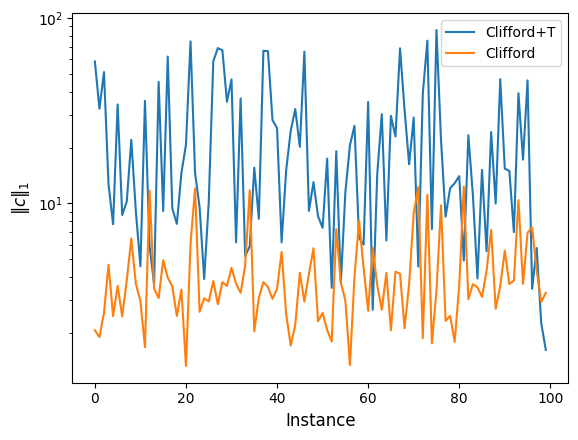

In [42]:
# comparing the negativity of the two bases
n_samples = 100

B_T = noiseless_basis(1,include_T=True)
B_Cliff = noiseless_basis(1,include_T=False)

plt.figure()
legends = []

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel(0,[(1.,qi.random_unitary(2))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'\n--------- {name} basis decomposition:\n\nmean(|c|_1)={np.mean(negativity)}, var(|c|_1)={np.var(negativity)}')
    plt.plot(negativity)
    legends.append(name)

plt.xlabel('Instance',fontsize='large')
plt.ylabel(r'$\|c\|_1$',fontsize='large')
plt.yscale('log')
plt.legend(legends);

# 2) Two-qubit basis

In [44]:
# 2-qubit CPTP maps (including T)
B = noiseless_basis(2,include_T=True)

print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{list(B.keys())}")
# print(f'\nHere are their Choi matrices:')
# for v in B.values():
#     print(f'{np.round(v,2)}')

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"

The following 241 channels form a basis of 1q CPTP maps:
[('HI',), ('IH',), ('SI',), ('IS',), ('HS',), ('SH',), ('CX',), ('XC',), ('TI',), ('IT',), ('HT',), ('TH',), ('ST',), ('TS',), ('HI', 'HI'), ('HI', 'IH'), ('HI', 'SI'), ('HI', 'SH'), ('HI', 'CX'), ('HI', 'XC'), ('HI', 'TI'), ('HI', 'TH'), ('HI', 'ST'), ('HI', 'TS'), ('IH', 'IS'), ('IH', 'HS'), ('IH', 'CX'), ('IH', 'XC'), ('IH', 'IT'), ('IH', 'HT'), ('IH', 'ST'), ('IH', 'TS'), ('SI', 'HI'), ('SI', 'IS'), ('SI', 'HS'), ('SI', 'CX'), ('SI', 'XC'), ('SI', 'HT'), ('SI', 'ST'), ('IS', 'IH'), ('IS', 'SH'), ('IS', 'CX'), ('IS', 'XC'), ('IS', 'TH'), ('HS', 'IH'), ('HS', 'SI'), ('HS', 'SH'), ('HS', 'CX'), ('HS', 'XC'), ('HS', 'TH'), ('HS', 'TS'), ('SH', 'HI'), ('SH', 'IS'), ('SH', 'HS'), ('SH', 'CX'), ('SH', 'XC'), ('SH', 'HT'), ('SH', 'ST'), ('CX', 'HI'), ('CX', 'IH'), ('CX', 'IS'), ('CX', 'HS'), ('CX', 'SH'), ('CX', 'XC'), ('CX', 'TI'), ('CX', 'IT'), ('CX', 'HT'), ('CX', 'TH')

In [45]:
# 2-qubit CPTP maps (excluding T)
B = noiseless_basis(2,include_T=False)

print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{list(B.keys())}")
# print(f'\nHere are their Choi matrices:')
# for v in B.values():
#     print(f'{np.round(v,2)}')

Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"

The following 241 channels form a basis of 1q CPTP maps:
[('HI',), ('IH',), ('SI',), ('IS',), ('HS',), ('SH',), ('CX',), ('XC',), ('HI', 'HI'), ('HI', 'IH'), ('HI', 'SI'), ('HI', 'SH'), ('HI', 'CX'), ('HI', 'XC'), ('IH', 'IS'), ('IH', 'HS'), ('IH', 'CX'), ('IH', 'XC'), ('SI', 'HI'), ('SI', 'SI'), ('SI', 'IS'), ('SI', 'HS'), ('SI', 'SH'), ('SI', 'CX'), ('SI', 'XC'), ('IS', 'IH'), ('IS', 'IS'), ('IS', 'HS'), ('IS', 'SH'), ('IS', 'CX'), ('IS', 'XC'), ('HS', 'IH'), ('HS', 'SI'), ('HS', 'SH'), ('HS', 'CX'), ('HS', 'XC'), ('SH', 'HI'), ('SH', 'IS'), ('SH', 'HS'), ('SH', 'CX'), ('SH', 'XC'), ('CX', 'HI'), ('CX', 'IH'), ('CX', 'IS'), ('CX', 'HS'), ('CX', 'SH'), ('CX', 'XC'), ('XC', 'HI'), ('XC', 'IH'), ('XC', 'SI'), ('XC', 'HS'), ('XC', 'SH'), ('XC', 'CX'), ('HI', 'IH', 'CX'), ('HI', 'IH', 'XC'), ('HI', 'SI', 'HI'), ('HI', 'SI', 'SI'), ('HI', 'SI', 'HS'), ('HI', 'SI', 'SH'), ('HI', 'SI', 'CX'), ('HI', 'SI', 'XC'), ('HI', 'SH', 'HI'), ('H

In [34]:
B_T = noiseless_basis(2,include_T=True)
B_Cliff = noiseless_basis(2,include_T=False)

U = gates.UnitaryChannel((0,1),[(1.,qi.random_unitary(4))]).to_choi()
print(f'\n--------- Random unitary channel:\n\nU={np.round(U,2)}\n')

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    c = decomposition_coefficients(U, B)
    negativity = np.linalg.norm(c,1)
    
    #sanity check
    U_expanded = np.sum([c[i]*list(B.values())[i] for i in range(len(B))],0)
    error = np.linalg.norm(U-U_expanded)
    print(f'--------- {name} basis decomposition:\n\nc={np.round(c,2)}\n\n|c|_1={np.round(negativity,2)}\n\nerror={np.round(error,2)}\n')

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"

--------- Random unitary channel:

U=[[ 0.76+0.j    0.12-0.02j  0.38-0.01j  0.15-0.06j  0.01-0.02j  0.43-0.59j
  -0.22+0.05j  0.21+0.36j -0.4 -0.05j  0.23-0.11j  0.72+0.12j  0.02-0.05j
  -0.14-0.j    0.17+0.33j -0.08-0.19j  0.74-0.1j ]
 [ 0.12+0.02j  0.02+0.j    0.06+0.01j  0.02-0.01j  0.  -0.j    0.08-0.09j
  -0.04+0.j    0.03+0.06j -0.06-0.02j  0.04-0.01j  0.11+0.03j  0.  -0.01j
  -0.02-0.j    0.02+0.06j -0.01-0.03j  0.12-0.j  ]
 [ 0.38+0.01j  0.06-0.01j  0.19-0.j    0.07-0.03j  0.01-0.01j  0.22-0.29j
  -0.11+0.02j  0.1 +0.18j -0.2 -0.03j  0.12-0.05j  0.35+0.07j  0.01-0.02j
  -0.07-0.j    0.08+0.17j -0.04-0.09j  0.37-0.04j]
 [ 0.15+0.06j  0.02+0.01j  0.07+0.03j  0.03-0.j    0.  -0.j    0.13-0.08j
  -0.05-0.01j  0.01+0.08j -0.07-0.04j  0.05-0.j    0.13+0.08j  0.01-0.01j
  -0.03-0.01j  0.01+0.08j -0.  -0.04j  0.15+0.04j]
 [ 0.01+0.02j  0.  +0.j    0.01+0.01j  0.  +0.j  

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"

--------- Clifford+T basis decomposition:

mean(|c|_1)=9748.01759093078, var(|c|_1)=64800349.78208275

--------- Clifford basis decomposition:

mean(|c|_1)=779.8194226527256, var(|c|_1)=191790.53187643754


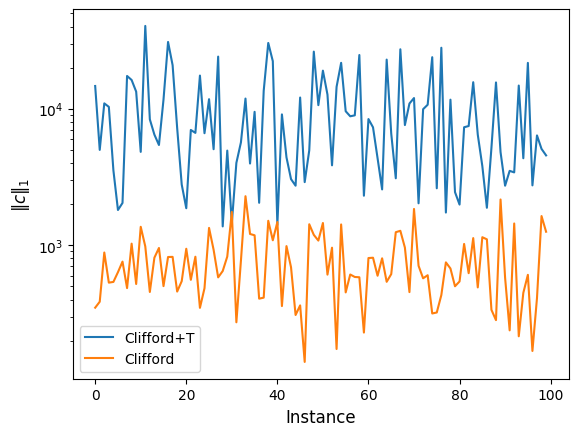

In [43]:
# comparing the negativity of the two bases
n_samples = 100

B_T = noiseless_basis(2,include_T=True)
B_Cliff = noiseless_basis(2,include_T=False)

plt.figure()
legends = []

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel((0,1),[(1.,qi.random_unitary(4))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'\n--------- {name} basis decomposition:\n\nmean(|c|_1)={np.mean(negativity)}, var(|c|_1)={np.var(negativity)}')
    plt.plot(negativity)
    legends.append(name)

plt.xlabel('Instance',fontsize='large')
plt.ylabel(r'$\|c\|_1$',fontsize='large')
plt.yscale('log')
plt.legend(legends);